<a href="https://colab.research.google.com/github/vishal0820/Data-science-projects/blob/main/Data-science-projects/Spending_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Spending_pattern.csv')
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [ ]:
df.drop('Customer ID',axis=1,inplace=True)

In [ ]:
df.head()

,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [ ]:
df.isna().sum()

,0
Category,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.000000,10000.000000
mean,2.237200,969.957948,2534.750890
std,1.481133,6104.403843,19676.741772
min,1.000000,1.000000,1.110000
25%,1.000000,12.960000,25.957500
50%,1.000000,51.860000,88.115000
75%,3.000000,177.587500,336.375000
max,5.000000,74246.460000,352230.760000


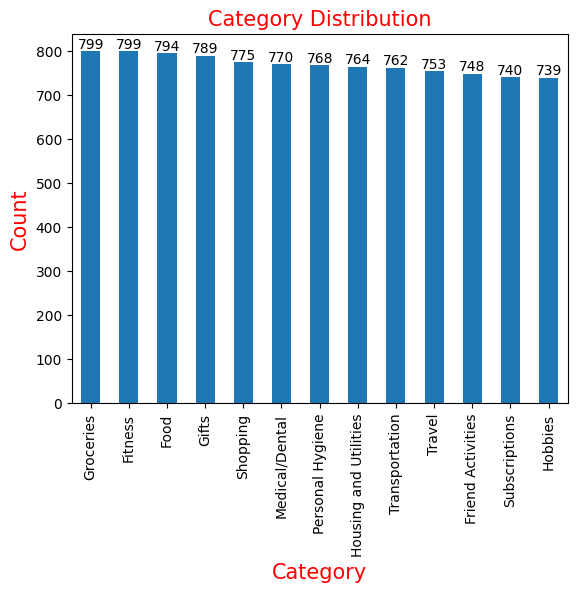

In [ ]:
total_Category=df["Category"].value_counts()
total_Category.plot(kind="bar")
for i,values in enumerate(total_Category):
    plt.text(i,values,str(values),ha="center",va="bottom")

plt.xlabel("Category",fontsize=15,color="red")
plt.ylabel("Count",fontsize=15,color="red")
plt.title("Category Distribution",fontsize=15,color="red")
plt.show()

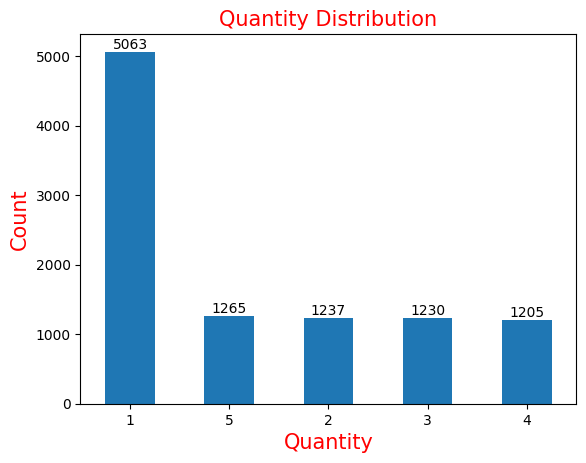

In [ ]:
total_Quantity=df["Quantity"].value_counts()
total_Quantity.plot(kind="bar")

for i,values in enumerate(total_Quantity):
    plt.text(i,values,str(values),ha="center",va="bottom")
plt.xlabel("Quantity",fontsize=15,color="red")
plt.ylabel("Count",fontsize=15,color="red")
plt.title("Quantity Distribution",fontsize=15,color="red")
plt.xticks(rotation=0)

plt.show()

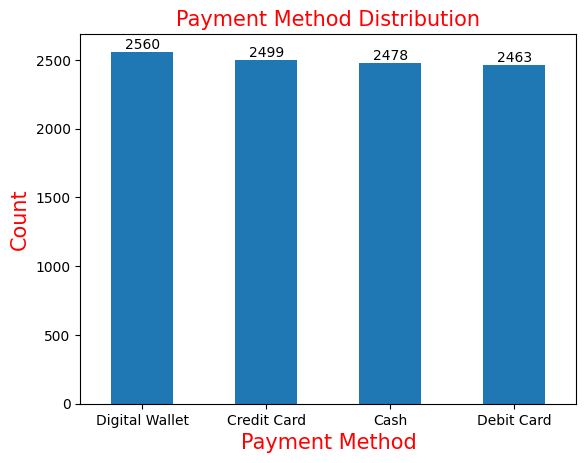

In [ ]:
total_PaymentMethod=df["Payment Method"].value_counts()
total_PaymentMethod.plot(kind="bar")
for i,values in enumerate(total_PaymentMethod):
    plt.text(i,values,str(values),ha="center",va="bottom")

plt.xlabel("Payment Method",fontsize=15,color="red")
plt.ylabel("Count",fontsize=15,color="red")
plt.title("Payment Method Distribution",fontsize=15,color="red")
plt.xticks(rotation=0)
plt.show()

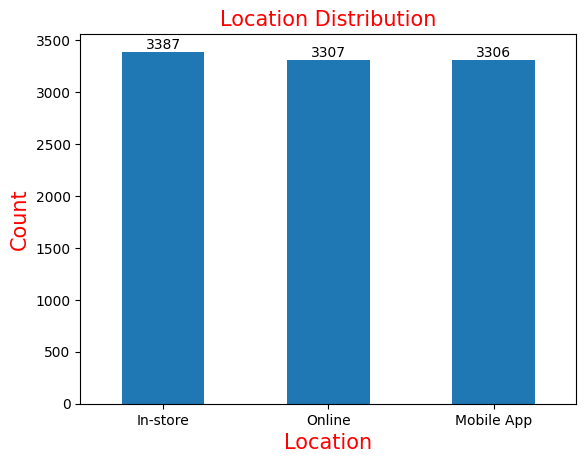

In [ ]:
total_Location=df["Location"].value_counts()
total_Location.plot(kind="bar")

for i,values in enumerate(total_Location):
    plt.text(i,values,str(values),ha="center",va="bottom")

plt.xlabel("Location",fontsize=15,color="red")
plt.ylabel("Count",fontsize=15,color="red")
plt.title("Location Distribution",fontsize=15,color="red")
plt.xticks(rotation=0)

plt.show()

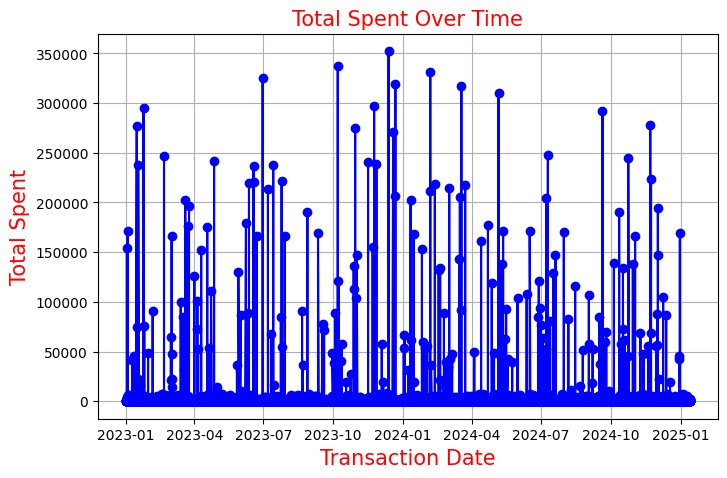

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df = df.sort_values('Transaction Date')

plt.figure(figsize=(8, 5))
plt.plot(df['Transaction Date'], df['Total Spent'], marker='o', color='blue')
plt.title('Total Spent Over Time',fontsize=15,color="red")
plt.xlabel('Transaction Date',fontsize=15,color="red")
plt.ylabel('Total Spent',fontsize=15,color="red")
plt.grid(True)

plt.show()

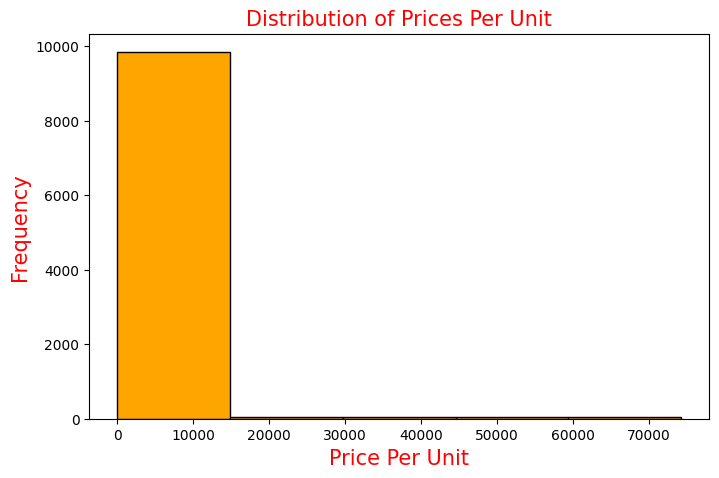

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price Per Unit'], bins=5, color='orange', edgecolor='black')
plt.title('Distribution of Prices Per Unit',fontsize=15,color="red")
plt.xlabel('Price Per Unit',fontsize=15,color="red")
plt.ylabel('Frequency',fontsize=15,color="red")
plt.show()

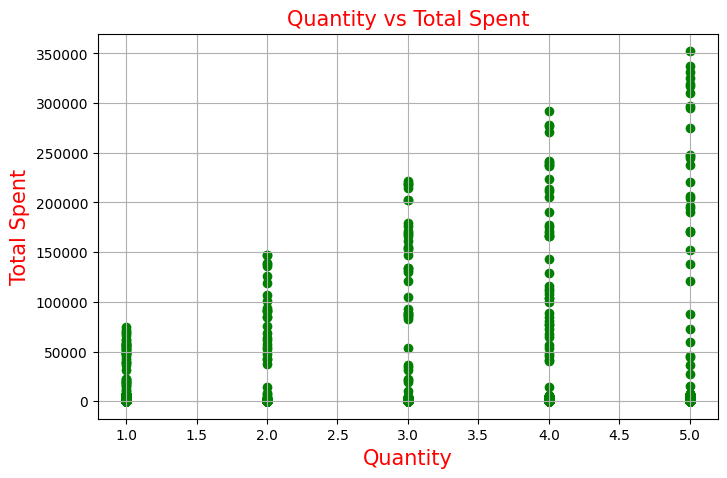

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Quantity'], df['Total Spent'], color='green')
plt.title('Quantity vs Total Spent',fontsize=15,color="red")
plt.xlabel('Quantity',fontsize=15,color="red")
plt.ylabel('Total Spent',fontsize=15,color="red")
plt.grid(True)
plt.show()

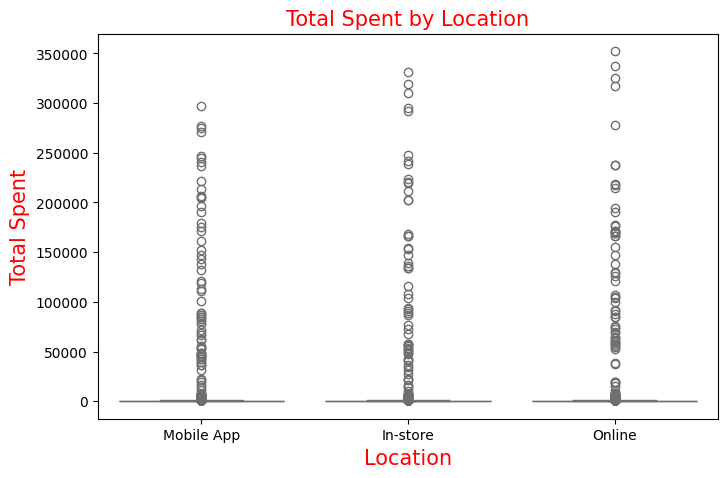

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Total Spent', data=df, palette='pastel')
plt.title('Total Spent by Location',fontsize=15,color="red")
plt.xlabel('Location',fontsize=15,color="red")
plt.ylabel('Total Spent',fontsize=15,color="red")
plt.show()

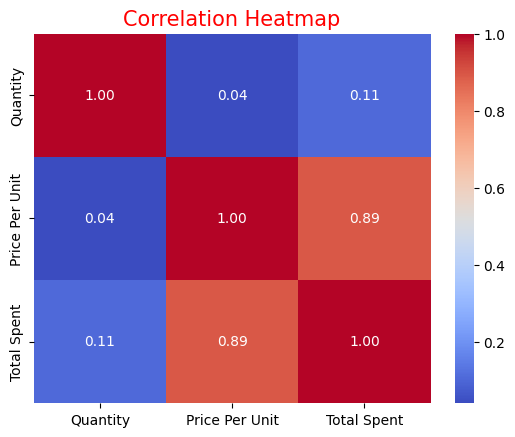

In [ ]:
corr = df[['Quantity', 'Price Per Unit', 'Total Spent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap',fontsize=15,color="red")
plt.show()

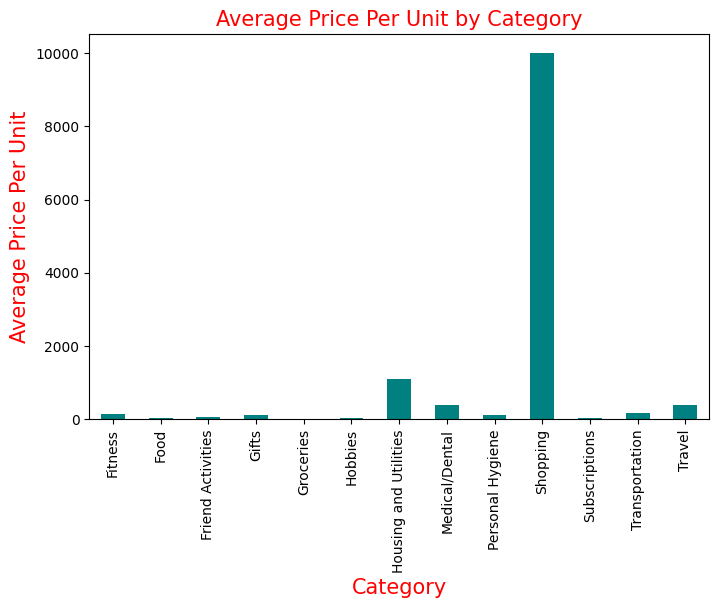

In [ ]:
plt.figure(figsize=(8, 5))
df.groupby('Category')['Price Per Unit'].mean().plot(kind='bar', color='teal')
plt.title('Average Price Per Unit by Category',fontsize=15,color="red")
plt.xlabel('Category',fontsize=15,color="red")
plt.ylabel('Average Price Per Unit',fontsize=15,color="red")
plt.xticks(rotation=90)
plt.show()

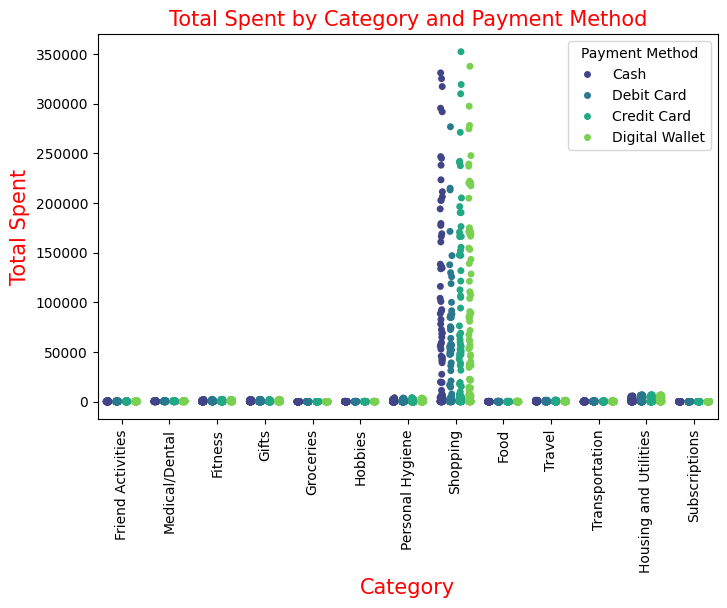

In [ ]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Category', y='Total Spent', hue='Payment Method', data=df, palette='viridis', dodge=True)
plt.title('Total Spent by Category and Payment Method',fontsize=15,color="red")
plt.xlabel('Category',fontsize=15,color="red")
plt.ylabel('Total Spent',fontsize=15,color="red")
plt.xticks(rotation=90)
plt.legend(title='Payment Method', bbox_to_anchor=(1, 1))
plt.show()

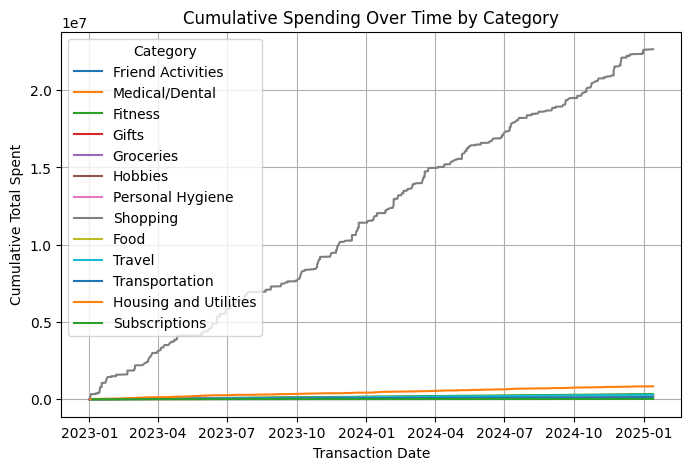

In [ ]:
df['Cumulative Total'] = df.groupby('Category')['Total Spent'].cumsum()
plt.figure(figsize=(8, 5))
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    plt.plot(subset['Transaction Date'], subset['Cumulative Total'], label=category)

plt.title('Cumulative Spending Over Time by Category')
plt.xlabel('Transaction Date')
plt.ylabel('Cumulative Total Spent')
plt.legend(title='Category')
plt.grid(True)
plt.show()